# Mixtures of Gaussians
## Load data and plot it

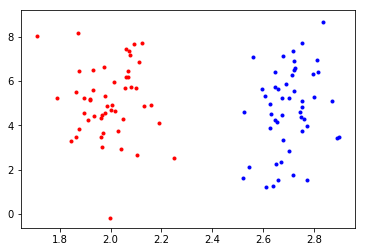

In [1]:
import numpy as np
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Load synthetic data and plot it [dataset1.mat, dataset2.mat, dataset3.mat, two_moons.mat, two_circles.mat]
data = sio.loadmat('datasets/dataset3.mat')
data1_true = np.array(data['x'].T)
data2_true = np.array(data['y'].T)
plt.scatter(data1_true[:, 0], data1_true[:, 1], c='r', marker='.');
plt.scatter(data2_true[:, 0], data2_true[:, 1], c='b', marker='.');

## Define or Initialize some variables and matrices

In [2]:
# Merge the data to one matrix
data = np.vstack((data1_true, data2_true))

K = 2
N, D = data.shape

# Initialize mu with K randomly selected data
permu = np.random.permutation(len(data))
mu = data[permu[:K]]

# Initialize convariance matrix for each cluster with identity matrix of shape (K, D, D)
cov = np.zeros((K, D, D))
for k in range(K):
    cov[k] = np.identity(D)
    
# Initialize phi vector with uniform distribution
phi = np.ones((K)) / K

# Initialize responsibility matrix with zeros of shape (N, K)
resp = np.zeros((N, K))

## Train

In [3]:
max_iter = 1000
for step in range(max_iter):
    #=============================================
    # E step : Evaluate the responsibilities 
    #          using the current parameter values
    
    # use multivariate_normal.pdf() function to calculate multivariate normal distribution
    prob_den_mat = np.zeros((N, K))
    for k in range(K):
        prob_den_mat[:, k] = phi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=cov[k])
    resp = prob_den_mat / np.sum(prob_den_mat, axis=1, keepdims=True)
    Nk = np.sum(resp, axis=0)
    
    #=============================================
    # M step : Re-estimate the parameters
    #          using current responsibilities
    
    # Update mu
    for k in range(K):
        mu[k] = np.dot(resp[:,k], data) / Nk[k]
    
    # Update covariance
    for k in range(K):
        temp_sum = np.zeros((D,D))
        for n in range(N):
            xmu = np.expand_dims(data[n] - mu[k], 1)
            temp_sum += resp[n,k] * np.matmul(xmu, xmu.T)
        cov[k] = temp_sum / Nk[k]
        
    # Update phi
    phi = Nk / N
    
    # Compute log-likelihood
    prob_den_mat = np.zeros((N, K))
    for k in range(K):
        prob_den_mat[:, k] = phi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=cov[k])
    log_likelihood = np.sum(np.log(np.sum(prob_den_mat, 1) + 1e-10))
    print log_likelihood


# for step in range(max_iter):
#     #=============================================
#     # E step : Evaluate the responsibilities 
#     #          using the current parameter values
    
#     prob_den_mat = np.zeros((N, K))
#     for k in range(K):
#         prob_den_mat[:, k] = phi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=cov[k])
#     resp = prob_den_mat / np.sum(prob_den_mat, axis=1, keepdims=True)
#     Nk = np.sum(resp, axis=0)
    
    
#     #=============================================
#     # M step : Re-estimate the parameters
#     #          using current responsibilities
    
#     # Update mu
#     mu = np.matmul(resp.T, data) /  np.expand_dims(Nk, 1)
    
#     # Update covariance
#     sig = np.expand_dims(data, 1) - np.expand_dims(mu, 0)
#     delta = np.matmul(np.expand_dims(sig, 3), np.expand_dims(sig, 2))
#     cov = np.sum(np.reshape(resp, [N, K, 1, 1]) * delta, axis=0) / np.reshape(Nk, [K,1,1])
    
#     # Update phi
#     phi = Nk / N
    
#     # Compute log-likelihood
#     prob_den_mat = np.zeros((N, K))
#     for k in range(K):
#         prob_den_mat[:, k] = phi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=cov[k])
#     log_likelihood = np.sum(np.log(np.sum(prob_den_mat, 1) + 1e-10))
#     print log_likelihood
    
print 'done'
predicted_cluster = np.argmax(resp, axis=1)

-237.332058262
-237.055599392
-236.971116285
-236.932427564
-236.908427354
-236.890936815
-236.877241645
-236.866170796
-236.8570727
-236.84951222
-236.843167825
-236.837789969
-236.833180397
-236.829179768
-236.825659241
-236.822514298
-236.819660034
-236.817027469
-236.814560621
-236.812214165
-236.809951546
-236.80774345
-236.805566568
-236.803402578
-236.801237326
-236.799060141
-236.796863277
-236.794641448
-236.792391439
-236.790111774
-236.78780244
-236.785464636
-236.783100569
-236.780713257
-236.778306363
-236.775884044
-236.77345081
-236.771011401
-236.768570671
-236.766133487
-236.763704638
-236.761288755
-236.758890243
-236.756513221
-236.754161479
-236.751838437
-236.749547119
-236.747290138
-236.745069684
-236.742887523
-236.740745003
-236.738643059
-236.736582233
-236.734562686
-236.73258422
-236.730646299
-236.728748064
-236.726888361
-236.725065752
-236.723278537
-236.721524766
-236.719802249
-236.718108568
-236.716441078
-236.714796908
-236.713172956
-236.711565881
-2

-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.749111865
-170.74911

## Compare true clusters and predicted clusters

Prediction | Cluster1: (50, 2), Cluster2: (50, 2)
True       | Cluster1: (50, 2), Cluster2: (50, 2)


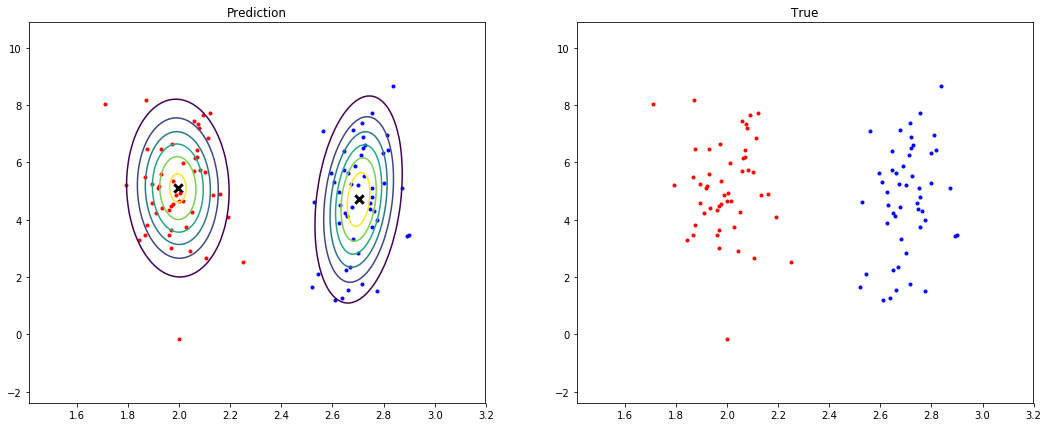

In [4]:
data1 = data[predicted_cluster == 0]
data2 = data[predicted_cluster == 1]
print("Prediction | Cluster1: {}, Cluster2: {}".format(data1.shape, data2.shape))
print("True       | Cluster1: {}, Cluster2: {}".format(data1_true.shape, data2_true.shape))

# Plot the data and compare it with true labeled data
f, axarr = plt.subplots(1, 2, figsize=(18, 7))
axarr[0].scatter(mu[0, 0], mu[0, 1], c='k', marker='x', s=70, linewidth=3);
axarr[0].scatter(mu[1, 0], mu[1, 1], c='k', marker='x', s=70, linewidth=3);
axarr[0].scatter(data1[:, 0], data1[:, 1], c='r', marker='.');
axarr[0].scatter(data2[:, 0], data2[:, 1], c='b', marker='.');
x_min = np.min(data[:, 0])
x_max = np.max(data[:, 0])
x_margin = (x_max - x_min) / 4
x_min = x_min - x_margin
x_max = x_max + x_margin
y_min = np.min(data[:, 1])
y_max = np.max(data[:, 1])
y_margin = (y_max - y_min) / 4
y_min = y_min - y_margin
y_max = y_max + y_margin
x = np.arange(x_min, x_max, x_margin / 20)
y = np.arange(y_min, y_max, y_margin / 20)
X, Y = np.meshgrid(x, y)
X_ = np.reshape(X, (-1, 1))
Y_ = np.reshape(Y, (-1, 1))
grid = np.hstack((X_, Y_))
for k in range(K):
    Z = multivariate_normal.pdf(grid, mean=mu[k], cov=cov[k])
    Z = np.reshape(Z, (X.shape[0], X.shape[1]))
    axarr[0].contour(X, Y, Z)
axarr[0].set_xlim([x_min, x_max]);
axarr[0].set_ylim([y_min, y_max]);
axarr[0].set_title('Prediction');

axarr[1].scatter(data1_true[:, 0], data1_true[:, 1], c='r', marker='.');
axarr[1].scatter(data2_true[:, 0], data2_true[:, 1], c='b', marker='.');
axarr[1].set_xlim([x_min, x_max]);
axarr[1].set_ylim([y_min, y_max]);
axarr[1].set_title('True');

## Evaluate how well K-means clustered data

In [5]:
# Evaluate clustering performance using Normalized Mutual Information
def get_NMI(true_cluster, predicted_cluster, K):
    """
    Get Normalized Mutual Information
    
    Args:
        true_cluster: a vector of shape (N) that has elements assigned true cluster for each data point
        predicted_cluster: a vector of shape (N) that has elements assigned predicted cluster for each data point
        K: the number of clusters
    Returns:
        nmi: Normalized mutual information
    """
    # very little value to prevent logarithm from -infinity
    eps = 1e-10
    
    # Define the number of data
    N = float(data.shape[0])
    
    true_entropy = 0
    predicted_entropy = 0
    # Compute entropy for ground truth clusters and predicted clusters
    for k in range(K):
        true_ctr = np.sum(true_cluster == k)
        predicted_ctr = np.sum(predicted_cluster == k)
        true_entropy += -(true_ctr / N) * np.log2(true_ctr / N + eps)
        predicted_entropy += -(predicted_ctr / N) * np.log2(predicted_ctr / N + eps)
    
    denominator = (true_entropy + predicted_entropy) / 2.
    
    mi = 0
    # Compute mutual information between ground truth clusters and predicted clusters
    for i in range(K):
        for j in range(K):
            true_k = true_cluster == i
            predicted_k = predicted_cluster == j
            inter_ctr = np.sum(true_k & predicted_k)
            true_ctr = np.sum(true_k)
            predicted_ctr = np.sum(predicted_k)
            mi += (inter_ctr / N) * np.log2((N * inter_ctr) / (true_ctr * predicted_ctr) + eps)
    
    nmi = mi / denominator
    
    return nmi

true_cluster = np.concatenate((np.zeros(data1_true.shape[0]), np.ones(data2_true.shape[0])))
nmi = get_NMI(true_cluster, predicted_cluster, K)
print("Nomrlized Mutual Information: {}".format(nmi))

Nomrlized Mutual Information: 1.00000000036
